# **Simple Linear Regression using Scikit-learn**
In this example we are going to predict the percentage of marks a student is going to receive based on the number of hours he/she studies.

In [44]:
#importing useful modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
#reading csv data
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
#checking data shape
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


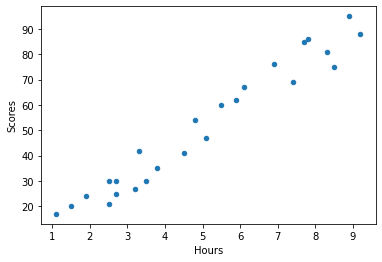

In [7]:
#visualizing data
data.plot(x='Hours',y='Scores',kind='scatter')
plt.show()

# **Preparing Data**
We will separate X & Y variables to split data into train & test set.

In [8]:
#storing features in separate variables
hours=data.iloc[:,0].values.reshape(-1,1)
scores=data.iloc[:,-1].values.reshape(-1,1)

In [9]:
#splitting data into train,test
x_train,x_test,y_train,y_test=train_test_split(hours,scores,test_size=0.2,random_state=42)

# **Training Model**
We will train data & get the weights of the model. Here incase of linear regression we will e getting coefficient of x and y-intercept.

In [10]:
#initialising and fitting model on train data
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.9491209376364417

In [ ]:
#retreiving model's weights(coefficient,y-intercept)
print("Linear model's coefficient: ", lr.coef_)
print("Linear model's y_intercept: ",lr.intercept_)

Linear model's coefficient:  [[9.68207815]]
Linear model's y_intercept:  [2.82689235]


# **Visualizing Model**
We will visualize model by plotting it to get the best fit line. 

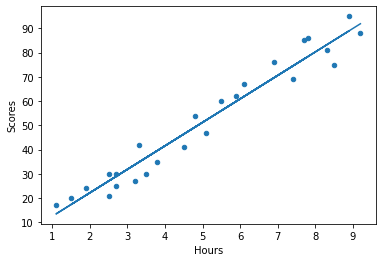

In [ ]:
#plotting model
line=lr.coef_*x_train+lr.intercept_
data.plot(x='Hours',y='Scores',kind='scatter')
plt.plot(x_train,line)
plt.show()

# **Predictions**
We will have look at the difference between actual test percentage and predicted test percentage and then get our final prediction on 9.25 hrs.

In [51]:
#prediction on test set
y_pred=lr.predict(x_test)
df_test=pd.DataFrame({'Actual %':y_test.flatten(),'Predicted %':y_pred.flatten()},index=[0,1,2,3,4])
df_test

,Actual %,Predicted %
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [43]:
#prediction using 9.25 hours.
pred=lr.predict(np.array([9.25]).reshape(-1,1))[0][0]
print('If student studies 9.25 hrs/day, he/she is going to secure ',pred,'%.')

If student studies 9.25 hrs/day, he/she is going to secure  92.38611528261494 %.


# **Model Evaluation**
Final step is to evaluate the model. Here in case of Linear Model, metric used to evaluate model will be Mean Absolute Error. The lower it is, the more better the model. 

In [53]:
mae=mean_absolute_error(y_test,y_pred)
print('The mean absolute error is: ',mae)

The mean absolute error is:  3.9207511902099244
